In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from math import floor


import json
from pprint import pprint

In [2]:
json_path="./data/balancers.json"
with open(json_path) as f:
    data = json.load(f)

In [3]:
timings = []

for d in data["datapoints"]:
    comp_time = list(map(lambda x: x["computationTime"],
                   d["data"]["workers"]))
    if d["balancer"] == "predictionRecursive":
        timings += comp_time
     

# time in s
timings = np.asarray(timings) / 1e6
print(timings)

[2.1814090e+00 5.4988880e+00 5.3245350e+00 4.5609210e+00 7.1302210e+00
 7.0577050e+00 6.9946920e+00 3.5505170e+00 3.5428390e+00 5.4831770e+00
 5.7056900e+00 5.3768490e+00 7.0679930e+00 7.2705680e+00 5.9850600e+00
 3.6729120e+00 3.4566430e+00 3.5832190e+00 7.1395020e+00 7.0699020e+00
 7.0467430e+00 7.1091340e+00 7.0896650e+00 2.4181450e+00 3.6152430e+00
 6.4379610e+00 6.6503830e+00 7.8721980e+00 3.5400410e+00 6.9268610e+00
 3.4379870e+00 8.7645790e+00 9.0470630e+00 1.0613440e+01 1.1639270e+01
 1.5122329e+01 7.5799000e-02 1.7163100e-01 1.5240100e-01 1.3588600e-01
 1.2808600e-01 1.2875130e+00 7.9313800e-01 3.8673100e-01 5.8403100e-01
 3.8374800e-01 2.4789650e+00 1.2062620e+00 4.0284800e-01 3.6464400e-01
 5.2070300e-01 1.9859710e+00 5.6555840e+00 2.1105390e+00 3.5345650e+00
 9.4632000e-02 1.8242770e+00 2.5154700e-01 9.3631000e-02 6.3316900e-01
 4.8752000e-01 2.5953090e+00 3.5408410e+00 1.4981510e+00 3.5513280e+00
 1.0909430e+00 1.0650300e-01 1.0665600e-01 2.0995870e+00 2.6167900e-01
 1.626

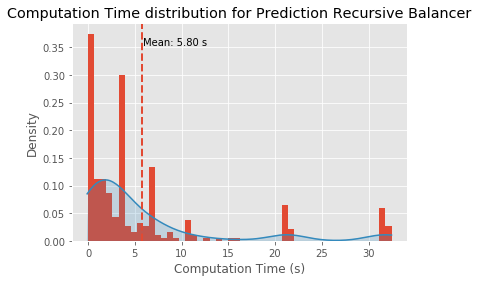

In [4]:
# Data for plotting

num_bins = 50
plt.style.use('ggplot')
fig, ax = plt.subplots()

# draw histogram
n, bins, patches = ax.hist(timings, num_bins, density= 1)
# ax.legend()
ax.set(xlabel='Computation Time (s)', ylabel='Density',
       title='Computation Time distribution for Prediction Recursive Balancer')
ax.grid(True)

# plot kernel density estimate
density = gaussian_kde(timings)
xs = np.linspace(-0.1, timings.max(), 200)
density.covariance_factor = lambda : .25
density._compute_covariance()
ys = density(xs)

kde_line = ax.plot(xs, ys)
# TODO: Find a better way to do this
ys[0] = 0
ys[-1] = 0
kde_fill = ax.fill(xs, ys, alpha=.2)
kde_fill[0].set_color(kde_line[0].get_color())

# plot median
ax.axvline(timings.mean(), linestyle='dashed', linewidth=2)
_, max_ = plt.ylim()
plt.text(timings.mean() + timings.mean() / num_bins, 
         max_ - max_ / 10, 
         'Mean: {:.2f} s'.format(timings.mean()))

# fig.savefig("distribution.svg", format="svg")
plt.show()